Step 1: Load Libraries and Data

In [29]:
#Import packages
import numpy as np
import pandas as pd

# Import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_style("white")

In [32]:
# File paths
tsv_file = '.\\Participant_data/subject-Claudius.tsv'
log_file = '.\\Participant_data/subject-Claudius_log.txt'
csv_file = '.\\Participant_data/subject-Claudius.csv'

# Load the data
data_tsv = pd.read_csv(tsv_file, sep='\t')
data_csv = pd.read_csv(csv_file)

In [19]:


# #import CSV
# # loop to define,and append the variables into a list.
# df = []
# amt = 4 # The amount of properly labeled tsv files
# for n in range(amt):
#     #d = pd.read_csv(fr'.\\subject-{n+1}.tsv', sep='\t')
#     d = pd.read_csv(fr'.\\Participant_data/subject-Claudius.tsv', sep='\t')
#     #F-strings ('f' before the opening quotation mark) provide a way to embed variables and expressions directly within strings.  
#     df.append(d)
#     #If you want to call subject3 (df3), you can call df[3], if you want df5, call df[5], etc.
#     # Test whether data_tsv is a Pandas dataFrame
#     assert isinstance(df[n], pd.dataFrame) == True



In [20]:
# # Sample subject to visualize (you can change this)
# subject_index = 0  # For example 2, to visualize subject 3

# # Select the relevant data_tsvFrame
# data_tsv = df[subject_index]

In [21]:
#display 5 rows of 1st participant
data_tsv.head(5)

,CNT,TIME,TIME_TICK,FPOGX,FPOGY,FPOGS,FPOGD,FPOGID,FPOGV,LPOGX,...,LPUPILV,REYEX,REYEY,REYEZ,RPUPILD,RPUPILV,CX,CY,CS,USER
0,321272,2872.95166,53155120535,0.56458,0.48207,2872.22412,0.72754,7035,1,0.56734,...,1,0.03508,0.02732,0.61734,0.00344,1,0.56042,0.43519,0,STOP_TRIAL
1,321273,2872.96777,53155281757,0.56467,0.48237,2872.22412,0.74365,7035,1,0.56902,...,1,0.03508,0.02732,0.61734,0.00340,1,0.56042,0.43519,0,NaN
2,321274,2872.98535,53155455666,0.56475,0.48265,2872.22412,0.76123,7035,1,0.56902,...,1,0.03508,0.02722,0.61734,0.00342,1,0.56042,0.43519,0,START_TRIAL
3,321275,2873.00024,53155605435,0.56578,0.48345,2872.22412,0.77612,7035,1,0.55954,...,1,0.03508,0.02722,0.61734,0.00343,1,0.56042,0.43519,0,NaN
4,321276,2873.01660,53155769203,0.56543,0.48391,2872.22412,0.79248,7035,1,0.55893,...,1,0.03508,0.02722,0.61734,0.00344,1,0.56042,0.43519,0,NaN


In [22]:
data_csv.head(5)

,acc,accuracy,average_response_time,avg_rt,background,canvas_backend,central_fixation,clock_backend,color_backend,correct,...,time_welcome,title,total_correct,total_response_time,total_responses,width,x1_cor,x2_cor,y1_cor,y2_cor
0,undefined,undefined,undefined,undefined,#3d3846,legacy,True,legacy,legacy,undefined,...,819,Left-Bias-Elimination,0,0,0,1920,277,-277,-160,160
1,undefined,undefined,undefined,undefined,#3d3846,legacy,True,legacy,legacy,undefined,...,819,Left-Bias-Elimination,0,0,0,1920,277,-277,-160,160
2,undefined,undefined,undefined,undefined,#3d3846,legacy,True,legacy,legacy,undefined,...,819,Left-Bias-Elimination,0,0,0,1920,0,0,320,-320
3,undefined,undefined,undefined,undefined,#3d3846,legacy,False,legacy,legacy,undefined,...,819,Left-Bias-Elimination,0,0,0,1920,-160,160,-277,277
4,undefined,undefined,undefined,undefined,#3d3846,legacy,True,legacy,legacy,undefined,...,819,Left-Bias-Elimination,0,0,0,1920,160,-160,-277,277


Step 2: Load and Parse Log Data

In [23]:
# Load log data
with open(log_file, 'r') as file:
    log_data = file.readlines()

# Parse log data
logs = []
for line in log_data:
    if "start_trial" in line or "stop_trial" in line or "coordinates" in line:
        logs.append(line.strip())
        
# Create DataFrame for logs
log_df = pd.DataFrame(logs, columns=['log'])

# Function to extract timestamps and other details from logs
def extract_log_details(log_df):
    events = []
    for index, row in log_df.iterrows():
        if "start_trial" in row['log']:
            events.append({'timestamp': index, 'event': 'start_trial'})
        elif "stop_trial" in row['log']:
            events.append({'timestamp': index, 'event': 'stop_trial'})
        elif "coordinates" in row['log']:
            coords = row['log'].split(':')[1].strip()
            events.append({'timestamp': index, 'event': 'coordinates', 'coords': coords})
    return pd.DataFrame(events)

# Extracting log details
log_events = extract_log_details(log_df)
log_events.head()

,timestamp,event,coords
0,0,start_trial,NaN
1,1,coordinates,"(277,-160, -277, 160)"
2,2,stop_trial,NaN
3,3,start_trial,NaN
4,4,coordinates,"(277,-160, -277, 160)"


Step 3: Different Plots

Step 3.1: Distribution of FPOGX

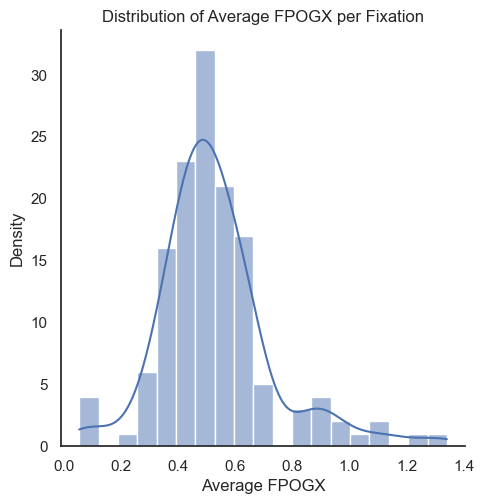

In [36]:
df_fixations = data_tsv.groupby('FPOGID')['FPOGX'].mean().reset_index()

# Plot the distribution using seaborn's displot
sns.displot(df_fixations, x='FPOGX', kde=True) 
plt.title('Distribution of Average FPOGX per Fixation')
plt.xlabel('Average FPOGX')
plt.ylabel('Density')
plt.show()

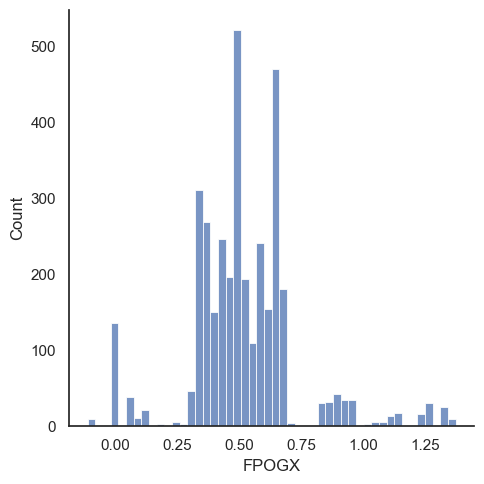

In [37]:
#test the dataset with a displot
#Use FPOGID instead of count to get Valid Counts (One fixation gets many counts)
sns.displot(data_tsv, x='FPOGX')

Step 3.2: Plot Time Against X-Position with Vertical Lines for Each User Log/Trigger

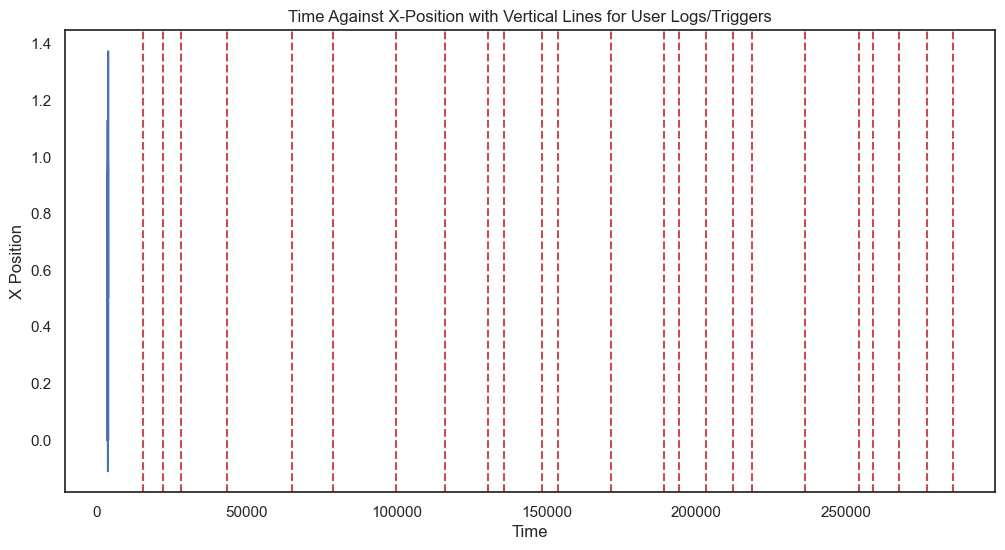

In [58]:
# **Time vs. X Plot**
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_tsv, x="TIME", y="FPOGX")
plt.title('Time Against X-Position with Vertical Lines for User Logs/Triggers')
plt.xlabel("Time")
plt.ylabel("X Position")

# Add vertical lines for each user log/trigger
for trigger_time in data_csv['time_image_stimulus']:
 plt.axvline(x=trigger_time, color='r', linestyle='--')
plt.show()

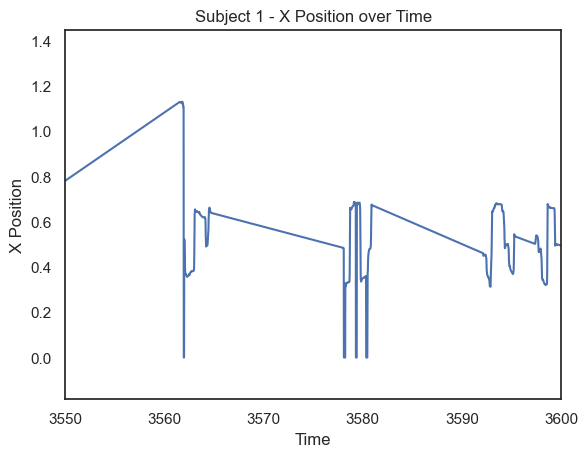

In [39]:
# **Time vs. X Plot** zoom in
sns.lineplot(data=data_tsv, x="TIME", y="FPOGX")
#sns.lineplot(data=data_tsv, x="TIME", y="BPOGX")
# Zoom in on the x-axis between 0.6 and 0.7
plt.xlim(3550, 3600)
plt.title(f"Subject {subject_index + 1} - X Position over Time")
plt.xlabel("Time")
plt.ylabel("X Position")
plt.show()

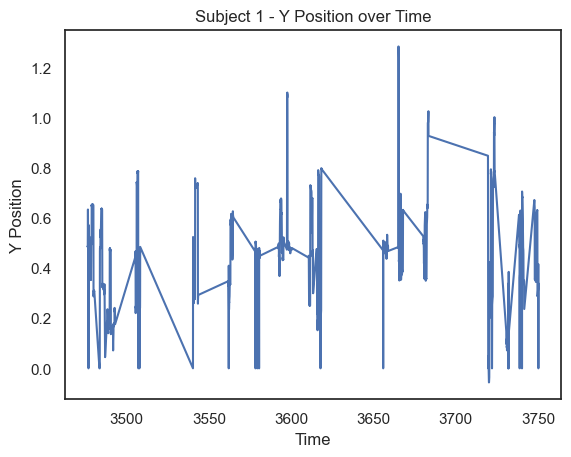

In [40]:
# **Time vs. Y Plot**
sns.lineplot(data=data_tsv, x="TIME", y="FPOGY")
plt.title(f"Subject {subject_index + 1} - Y Position over Time")
plt.xlabel("Time")
plt.ylabel("Y Position")
plt.show()

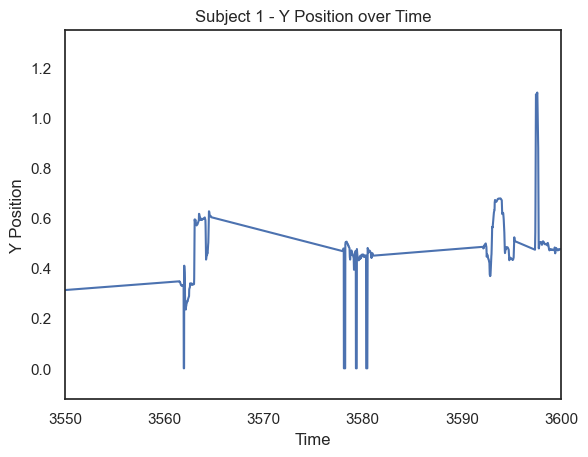

In [42]:
# **Time vs. Y Plot** zoom in
sns.lineplot(data=data_tsv, x="TIME", y="FPOGY")
# Zoom in on the x-axis between 0.6 and 0.7
plt.xlim(3550, 3600)
plt.title(f"Subject {subject_index + 1} - Y Position over Time")
plt.xlabel("Time")
plt.ylabel("Y Position")
plt.show()

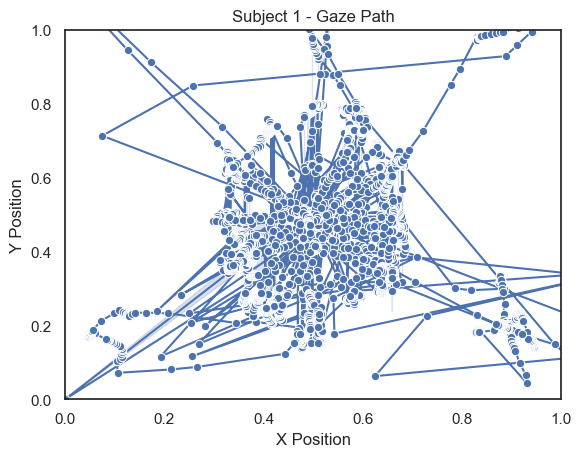

In [44]:
# **X vs. Y Plot (Gaze Path)**
#sns.scatterplot(data_tsv=data_tsv, x="FPOGX", y="FPOGY", s=40, hue='FPOGID')  # Use scatterplot for gaze path
sns.lineplot(data=data_tsv, x="FPOGX", y="FPOGY", marker='o', sort =False)  # Use scatterplot for gaze path
# Zoom in on the x-axis between 0.6 and 0.7

plt.title(f"Subject {subject_index + 1} - Gaze Path")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()


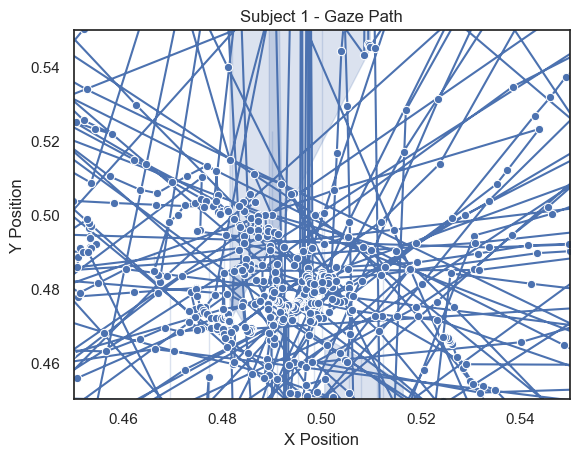

In [45]:
# **X vs. Y Plot (Gaze Path)**
#sns.scatterplot(data_tsv=data_tsv, x="FPOGX", y="FPOGY", s=40, hue='FPOGID')  # Use scatterplot for gaze path
sns.lineplot(data=data_tsv, x="FPOGX", y="FPOGY", marker='o', sort =False)  # Use scatterplot for gaze path
# Zoom in on the x- and y-axis
plt.xlim(0.45, 0.55)
plt.ylim(0.45, 0.55)
plt.title(f"Subject {subject_index + 1} - Gaze Path")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.show()


Step X: Check for Balancing/Randomization Errors

In [59]:
def check_balancing_errors(log_events):
    coordinates = log_events[log_events['event'] == 'coordinates']['coords'].value_counts()
    print("Coordinates frequency:")
    print(coordinates)
    
    # Here we could add more detailed checks for balancing/randomization if needed

check_balancing_errors(log_events)


Coordinates frequency:
coords
(277,-160, -277, 160)    2
(0,320, 0, -320)         2
(-160,-277, 160, 277)    2
(160,-277, -160, 277)    2
(-277,-160, 277, 160)    2
(-320,0, 320, 0)         2
(0,-320, 0, 320)         2
(160,277, -160, -277)    2
(320,0, -320, 0)         2
(277,160, -277, -160)    2
(-160,277, 160, -277)    2
(-277,160, 277, -160)    2
Name: count, dtype: int64


Step X+1: Calculate Accuracy/Precision while Gaze is on a Fixation-Cross

In [ ]:
def calculate_accuracy_precision(data_tsv, log_events):
    fixation_cross_coords = (0, 0)  # Assuming fixation cross is at the center
    
    # Filter data for fixation events
    fixation_data = data_tsv[data_tsv['event'] == 'fixation']
    fixation_distances = np.sqrt((fixation_data['x_position'] - fixation_cross_coords[0])**2 + 
                                 (fixation_data['y_position'] - fixation_cross_coords[1])**2)
    
    accuracy = fixation_distances.mean()
    precision = fixation_distances.std()
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")

calculate_accuracy_precision(data_tsv, log_events)
